In [3]:
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

In [4]:
df = pd.read_csv('balanced_video_fps_dataset_1.csv')
df.head()

,Connection_Speed (Mbps),Buffering_Rate (s),Video_Resolution,Video_FPS
0,23.240154,0.374095,360,24
1,42.914569,0.290750,720,30
2,89.188167,0.098546,1080,120
3,16.920892,0.625060,720,30
4,76.000925,0.077506,1080,60


Training Random Forest...
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.80      0.78        60
           1       0.70      0.63      0.67        49
           2       0.84      0.90      0.87        42
           3       0.94      0.92      0.93        49

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200

Random Forest Accuracy: 0.8100
Random Forest Confusion Matrix:


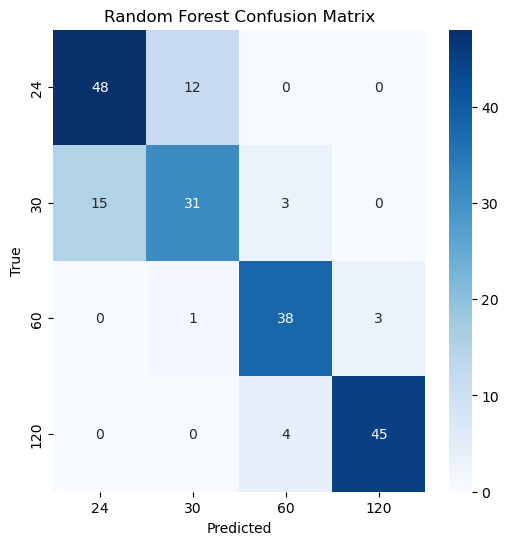

Training Logistic Regression...
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        60
           1       0.63      0.67      0.65        49
           2       0.80      0.93      0.86        42
           3       0.94      0.90      0.92        49

    accuracy                           0.79       200
   macro avg       0.79      0.80      0.79       200
weighted avg       0.79      0.79      0.78       200

Logistic Regression Accuracy: 0.7850
Logistic Regression Confusion Matrix:


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


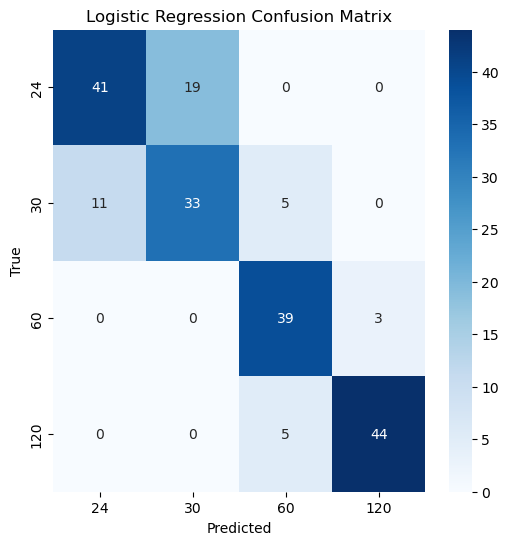

Saving the best model: Random Forest with accuracy 0.8100


['fps_model.pkl']

In [5]:
# Load the saved model and label encoders
loaded_model = joblib.load('fps_model.pkl')
label_encoder_resolution = joblib.load('label_encoder_resolution.pkl')
label_encoder_fps = joblib.load('label_encoder_fps.pkl')

# Function to get user input and make prediction
def predict_video_fps():
    print("\n--- Video FPS Prediction ---")
    
    # Get user inputs
    connection_speed = float(input("Enter Connection Speed (Mbps): "))
    buffering_rate = float(input("Enter Buffering Rate (s): "))
    
    # Get and encode Video Resolution
    resolution_options = list(label_encoder_resolution.classes_)
    print("\nAvailable Video Resolutions: ")
    for i, res in enumerate(resolution_options):
        print(f"{i}: {res}")
    resolution_input = int(input("Select Video Resolution (enter the corresponding number): "))
    
    # Ensure the input is within the valid range
    if resolution_input < 0 or resolution_input >= len(resolution_options):
        print("Invalid Video Resolution selection.")
        return
    
    video_resolution = resolution_input
    
    # Create a DataFrame for the input
    user_data = pd.DataFrame([[connection_speed, buffering_rate, video_resolution]], 
                             columns=['Connection_Speed (Mbps)', 'Buffering_Rate (s)', 'Video_Resolution'])
    
    # Make prediction
    prediction = loaded_model.predict(user_data)
    
    # Decode the predicted label
    predicted_fps = label_encoder_fps.inverse_transform(prediction)
    
    
    print("\nPredicted Video FPS:", predicted_fps[0])


predict_video_fps()


In [4]:
import joblib
import numpy as np

def predict_video_fps():
    try:
        model = joblib.load('FPS_model.pkl')
        label_encoder_fps = joblib.load('label_encoder_fps.pkl')
        label_encoder_resolution = joblib.load('label_encoder_resolution.pkl')
        
        connection_speed = float(input("Connection Speed (Mbps): "))
        buffering_rate = float(input("Buffering Rate (seconds): "))
        resolution = int(input("Video Resolution (144/360/720/1080): "))
        
        resolution_encoded = label_encoder_resolution.transform([resolution])[0]
        
        input_data = np.array([[connection_speed, buffering_rate, resolution_encoded]])
        
        prediction = model.predict(input_data)
        
        predicted_fps = label_encoder_fps.inverse_transform(prediction)[0]
        
        print(f"\nPredicted FPS: {predicted_fps}")
            
    except FileNotFoundError:
        print("Error: Model files not found.")
    except ValueError:
        print("Error: Invalid input.")
    except Exception as e:
        print(f"Error: {str(e)}")

predict_video_fps()


Connection Speed (Mbps):  21
Buffering Rate (seconds):  0.7656
Video Resolution (144/360/720/1080):  720



Predicted FPS: 24


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
